In [1]:
!pip install ucimlrepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import iqr#

### Sabrina's Notes

`ucimlr` package provides easy access to datasets from the UC Irvine Machine Learning Repository (UCI MLR). 

Reference: https://github.com/uci-ml-repo/ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset (the id is found on 'cite' in the UCI website)
abalone = fetch_ucirepo(id=1)

In [3]:
print(abalone.variables)

             name     role         type demographic  \
0             Sex  Feature  Categorical        None   
1          Length  Feature   Continuous        None   
2        Diameter  Feature   Continuous        None   
3          Height  Feature   Continuous        None   
4    Whole_weight  Feature   Continuous        None   
5  Shucked_weight  Feature   Continuous        None   
6  Viscera_weight  Feature   Continuous        None   
7    Shell_weight  Feature   Continuous        None   
8           Rings   Target      Integer        None   

                   description  units missing_values  
0         M, F, and I (infant)   None             no  
1    Longest shell measurement     mm             no  
2      perpendicular to length     mm             no  
3           with meat in shell     mm             no  
4                whole abalone  grams             no  
5               weight of meat  grams             no  
6  gut weight (after bleeding)  grams             no  
7        

In [4]:
# Metadata
print(abalone.metadata)

# Dataset note :+1.5 gives the age in years

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [5]:
abalone.data.original

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

In [6]:
df=abalone.data.original
df.head()

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
df.describe().T

count      mean       std     min     25%     50%     75%  \
Length          4177.0  0.523992  0.120093  0.0750  0.4500  0.5450   0.615   
Diameter        4177.0  0.407881  0.099240  0.0550  0.3500  0.4250   0.480   
Height          4177.0  0.139516  0.041827  0.0000  0.1150  0.1400   0.165   
Whole_weight    4177.0  0.828742  0.490389  0.0020  0.4415  0.7995   1.153   
Shucked_weight  4177.0  0.359367  0.221963  0.0010  0.1860  0.3360   0.502   
Viscera_weight  4177.0  0.180594  0.109614  0.0005  0.0935  0.1710   0.253   
Shell_weight    4177.0  0.238831  0.139203  0.0015  0.1300  0.2340   0.329   
Rings           4177.0  9.933684  3.224169  1.0000  8.0000  9.0000  11.000   

                    max  
Length           0.8150  
Diameter         0.6500  
Height           1.1300  
Whole_weight     2.8255  
Shucked_weight   1.4880  
Viscera_weight   0.7600  
Shell_weight     1.0050  
Rings           29.0000

In [9]:
# Add 1.5 to rings for get age
df['Age'] = df['Rings'] + 1.5

In [10]:
# We dont need rings column
df.drop("Rings",axis=1,inplace=True)
df.head()

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight   Age  
0         0.150  16.5  
1         0.070   8.5  
2         0.210  10.5  
3         0.155  11.5  
4         0.055   8.5

In [11]:
# Check null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Age               0
dtype: int64

In [12]:
# Values of this dataset can not be zero, check zeros
(df==0).any()

Sex               False
Length            False
Diameter          False
Height             True
Whole_weight      False
Shucked_weight    False
Viscera_weight    False
Shell_weight      False
Age               False
dtype: bool

In [13]:
df[df["Height"]==0]

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
1257   I   0.430      0.34     0.0         0.428          0.2065   
3996   I   0.315      0.23     0.0         0.134          0.0575   

      Viscera_weight  Shell_weight  Age  
1257          0.0860        0.1150  9.5  
3996          0.0285        0.3505  7.5

In [14]:
# We can delete these rows 2 in 4177
df = df.drop(df[df["Height"]==0].index)

In [15]:
# Check values
df[df["Height"]==0]

Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Whole_weight, Shucked_weight, Viscera_weight, Shell_weight, Age]
Index: []

In [16]:
# Reset indexes
df.reset_index(inplace=True)
df.drop("index",axis=1,inplace=True)

In [17]:
# Check columns
df.head()

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight   Age  
0         0.150  16.5  
1         0.070   8.5  
2         0.210  10.5  
3         0.155  11.5  
4         0.055   8.5

In [18]:
df.Age.value_counts()

10.5    689
11.5    634
9.5     567
12.5    487
8.5     391
13.5    267
7.5     258
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
28.5      2
25.5      2
2.5       1
27.5      1
30.5      1
3.5       1
26.5      1
Name: Age, dtype: int64

In [19]:
# Check relationship between columns, there is some outlier values
sns.pairplot(df)

In [20]:
# Select target columns
target_columns=[]
df_temp=df.drop(["Sex","Age"],axis=1)
target_columns=df_temp.columns.to_list()
target_columns

['Length',
 'Diameter',
 'Height',
 'Whole_weight',
 'Shucked_weight',
 'Viscera_weight',
 'Shell_weight']

### Sabrina's Notes

Detecting outliers 

Reference: https://stackoverflow.com/questions/66966605/outliers-formula-for-columns-in-pandas
Reference: https://gist.github.com/joseph-allen/14d72af86689c99e1e225e5771ce1600?permalink_comment_id=3554420
Reference: https://community.dataquest.io/t/detecting-outliers-and-deleting-them-in-python-or-r/8448/2

The code below goes through each characteristic of a dataset, such as age or height, checking for unusual values that don't fit the typical range. It figures out what the "normal" range of values is by looking at where most of the data falls (25% below and 75% below). Then, it marks anything far outside this range as unusual, and if there are too many unusual values, it removes them from the dataset. This helps make sure the dataset is accurate and useful for analysis, without any strange or incorrect data messing things up.

In [21]:
# Detect outliers

for i in df.columns:
  if i in target_columns :
        # 1st quartile
        Q1 = np.percentile(df[i],25)
        # 3rd quartile
        Q3 = np.percentile(df[i],75)
        # IQR calculation
        IQR = Q3 - Q1
        # Range calculation
        lower_bound = Q1 - (IQR * 1.5)
        upper_bound = Q3 + (IQR * 1.5)
        # Outlier detection
        print("Range of " + i  + " : "+ str(lower_bound)  + " - " + str(upper_bound))
        outliers = df[(df[i] <= lower_bound) | (df[i] >= upper_bound)]
        # Print outlier count
        print(f"Outlier count for column {i} : {len(outliers)}")
        # Delete outliers
        df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

Range of Length : 0.20250000000000004 - 0.8624999999999999
Outlier count for column Length : 49
Range of Diameter : 0.15499999999999997 - 0.675
Outlier count for column Diameter : 12
Range of Height : 0.039999999999999994 - 0.24000000000000002
Outlier count for column Height : 6
Range of Whole_weight : -0.6031874999999999 - 2.2173125
Outlier count for column Whole_weight : 28
Range of Shucked_weight : -0.27324999999999994 - 0.9647499999999999
Outlier count for column Shucked_weight : 25
Range of Viscera_weight : -0.13549999999999998 - 0.4805
Outlier count for column Viscera_weight : 15
Range of Shell_weight : -0.15325 - 0.60875
Outlier count for column Shell_weight : 28


In [22]:
# Check row count
df.describe().T

count       mean       std     min     25%      50%      75%  \
Length          4013.0   0.524533  0.110511  0.2050  0.4500   0.5400   0.6100   
Diameter        4013.0   0.408242  0.091758  0.1550  0.3500   0.4200   0.4800   
Height          4013.0   0.139090  0.035588  0.0400  0.1150   0.1400   0.1650   
Whole_weight    4013.0   0.809481  0.445060  0.0425  0.4475   0.7945   1.1330   
Shucked_weight  4013.0   0.350871  0.200989  0.0170  0.1890   0.3340   0.4935   
Viscera_weight  4013.0   0.176759  0.100637  0.0005  0.0950   0.1690   0.2465   
Shell_weight    4013.0   0.233437  0.125749  0.0130  0.1315   0.2300   0.3200   
Age             4013.0  11.442935  3.117503  4.5000  9.5000  10.5000  12.5000   

                    max  
Length           0.7600  
Diameter         0.6000  
Height           0.2400  
Whole_weight     2.1275  
Shucked_weight   0.9600  
Viscera_weight   0.4805  
Shell_weight     0.6050  
Age             30.5000

In [23]:
# Reset index
df.reset_index(inplace=True)
df.drop("index",axis=1,inplace=True)

In [24]:
df.head()

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight   Age  
0         0.150  16.5  
1         0.070   8.5  
2         0.210  10.5  
3         0.155  11.5  
4         0.055   8.5

In [25]:
# Extract dummy variables
Sex_dummies = pd.get_dummies(df['Sex'], prefix='Sex')
df = pd.concat([df, Sex_dummies], axis=1)
df.head()

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight   Age  Sex_F  Sex_I  Sex_M  
0         0.150  16.5      0      0      1  
1         0.070   8.5      0      0      1  
2         0.210  10.5      1      0      0  
3         0.155  11.5      0      0      1  
4         0.055   8.5      0      1      0

In [26]:
# Replace age column place
columns = list(df.columns)
columns.append(columns.pop(columns.index('Age')))
df = df[columns]
df.head()

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Sex_F  Sex_I  Sex_M   Age  
0         0.150      0      0      1  16.5  
1         0.070      0      0      1   8.5  
2         0.210      1      0      0  10.5  
3         0.155      0      0      1  11.5  
4         0.055      0      1      0   8.5

In [27]:
# Drop Sex column
df=df.drop("Sex",axis=1)
df.head()

Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Sex_F  Sex_I  Sex_M   Age  
0         0.150      0      0      1  16.5  
1         0.070      0      0      1   8.5  
2         0.210      1      0      0  10.5  
3         0.155      0      0      1  11.5  
4         0.055      0      1      0   8.5

In [28]:
# Print final dataframe
df.to_excel("Abolone.xlsx", index=False)

## Project Part 2

In [29]:
df.corr()

Length  Diameter    Height  Whole_weight  Shucked_weight  \
Length          1.000000  0.985519  0.889740      0.940036        0.913472   
Diameter        0.985519  1.000000  0.896402      0.939106        0.906991   
Height          0.889740  0.896402  1.000000      0.891478        0.837605   
Whole_weight    0.940036  0.939106  0.891478      1.000000        0.968244   
Shucked_weight  0.913472  0.906991  0.837605      0.968244        1.000000   
Viscera_weight  0.912445  0.907697  0.867697      0.964702        0.926837   
Shell_weight    0.915753  0.923392  0.898255      0.958049        0.886797   
Sex_F           0.306682  0.316169  0.316342      0.310763        0.275887   
Sex_I          -0.540366 -0.554254 -0.549196     -0.561065       -0.523608   
Sex_M           0.228107  0.232421  0.227348      0.244243        0.241570   
Age             0.516975  0.537673  0.578849      0.516195        0.392160   

                Viscera_weight  Shell_weight     Sex_F     Sex_I     Sex_M  \
Length                0.912445      0.915753  0.306682 -0.540366  0.228107   
Diameter              0.907697      0.923392  0.316169 -0.554254  0.232421   
Height                0.867697      0.898255  0.316342 -0.549196  0.227348   
Whole_weight          0.964702      0.958049  0.310763 -0.561065  0.244243   
Shucked_weight        0.926837      0.886797  0.275887 -0.523608  0.241570   
Viscera_weight        1.000000      0.912473  0.316736 -0.557414  0.234938   
Shell_weight          0.912473      1.000000  0.314563 -0.552794  0.232555   
Sex_F                 0.316736      0.314563  1.000000 -0.465652 -0.513319   
Sex_I                -0.557414     -0.552794 -0.465652  1.000000 -0.520449   
Sex_M                 0.234938      0.232555 -0.513319 -0.520449  1.000000   
Age                   0.480007      0.605703  0.240835 -0.418521  0.173483   

                     Age  
Length          0.516975  
Diameter        0.537673  
Height          0.578849  
Whole_weight    0.516195  
Shucked_weight  0.392160  
Viscera_weight  0.480007  
Shell_weight    0.605703  
Sex_F           0.240835  
Sex_I          -0.418521  
Sex_M           0.173483  
Age             1.000000

In [30]:
sns.pairplot(df)

## Length

<Axes: xlabel='Shell_weight', ylabel='Length'>

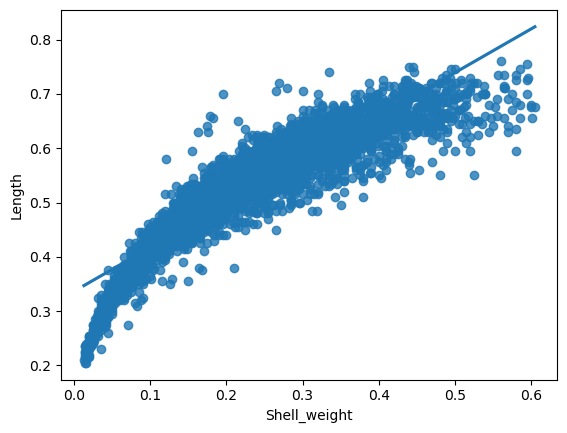

In [48]:
sns.regplot(x=df.Shell_weight, y=df.Length, ci=None)

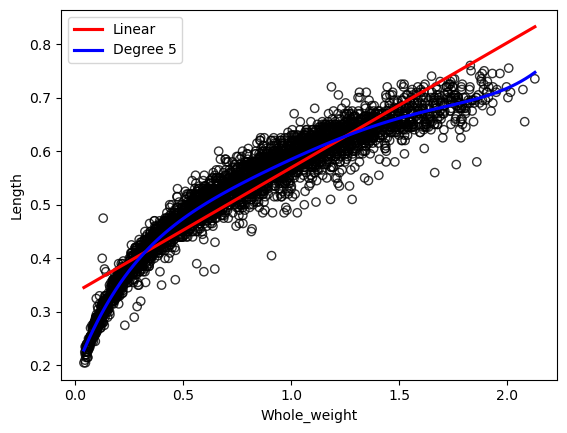

In [64]:
# Whole Weight

plt.scatter(x=df.Whole_weight, y=df.Length, facecolors='None', edgecolors='k', alpha=.8) 
sns.regplot(x=df.Whole_weight, y=df.Length, ci=None, label='Linear', scatter=False, color='red')
sns.regplot(x=df.Whole_weight, y=df.Length, ci=None, label='Degree 5', order=5, scatter=False, color='blue')
plt.legend()

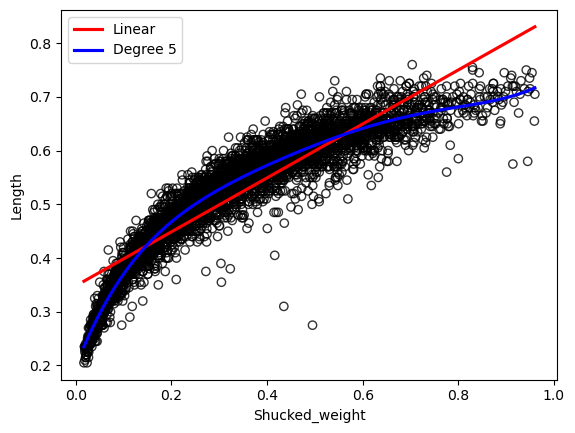

In [63]:
# Shucked Weight

plt.scatter(x=df.Shucked_weight, y=df.Length, facecolors='None', edgecolors='k', alpha=.8) 
sns.regplot(x=df.Shucked_weight, y=df.Length, ci=None, label='Linear', scatter=False, color='red')
sns.regplot(x=df.Shucked_weight, y=df.Length, ci=None, label='Degree 5', order=5, scatter=False, color='blue')
plt.legend()

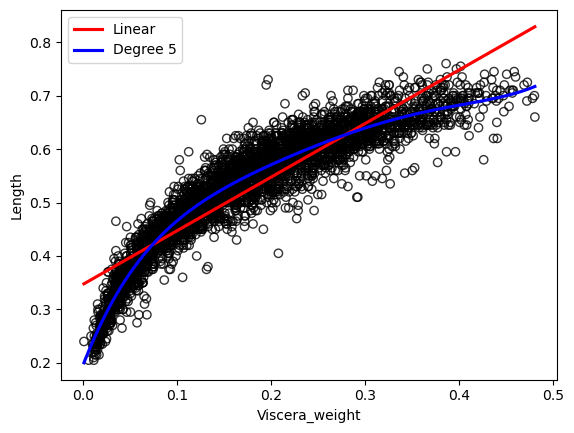

In [62]:
# Viscera Weight

plt.scatter(x=df.Viscera_weight, y=df.Length, facecolors='None', edgecolors='k', alpha=.8) 
sns.regplot(x=df.Viscera_weight, y=df.Length, ci=None, label='Linear', scatter=False, color='red')
sns.regplot(x=df.Viscera_weight, y=df.Length, ci=None, label='Degree 5', order=5, scatter=False, color='blue')
plt.legend()

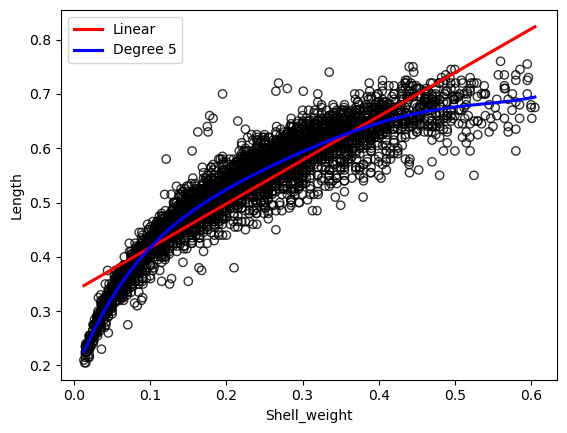

In [52]:
# Shell Weight

plt.scatter(x=df.Shell_weight, y=df.Length, facecolors='None', edgecolors='k', alpha=.8) 
sns.regplot(x=df.Shell_weight, y=df.Length, ci=None, label='Linear', scatter=False, color='red')
sns.regplot(x=df.Shell_weight, y=df.Length, ci=None, label='Degree 5', order=5, scatter=False, color='blue')
plt.legend()

## Diameter

In [61]:
# Whole Weight

plt.scatter(x=df.Whole_weight, y=df.Diameter, facecolors='None', edgecolors='k', alpha=.8) 
sns.regplot(x=df.Whole_weight, y=df.Diameter, ci=None, label='Linear', scatter=False, color='red')
sns.regplot(x=df.Whole_weight, y=df.Diameter, ci=None, label='Degree 5', order=5, scatter=False, color='blue')
plt.legend()

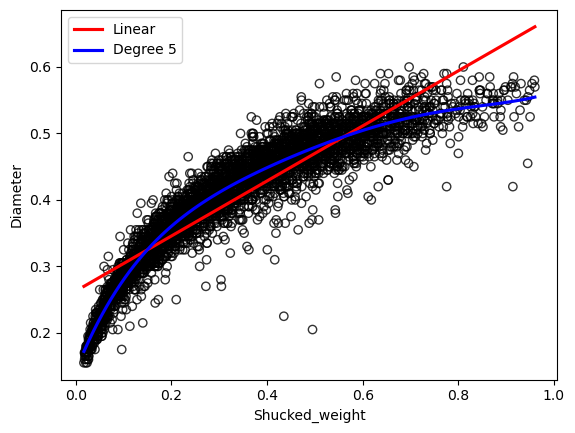

In [60]:
# Shucked Weight

plt.scatter(x=df.Shucked_weight, y=df.Diameter, facecolors='None', edgecolors='k', alpha=.8) 
sns.regplot(x=df.Shucked_weight, y=df.Diameter, ci=None, label='Linear', scatter=False, color='red')
sns.regplot(x=df.Shucked_weight, y=df.Diameter, ci=None, label='Degree 5', order=5, scatter=False, color='blue')
plt.legend()

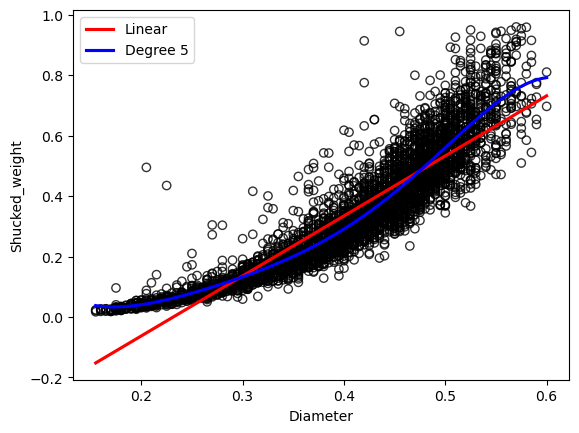

In [69]:
# Shucked Weight

plt.scatter(x=df.Diameter, y=df.Shucked_weight, facecolors='None', edgecolors='k', alpha=.8) 
sns.regplot(x=df.Diameter, y=df.Shucked_weight, ci=None, label='Linear', scatter=False, color='red')
sns.regplot(x=df.Diameter, y=df.Shucked_weight, ci=None, label='Degree 5', order=5, scatter=False, color='blue')
plt.legend()

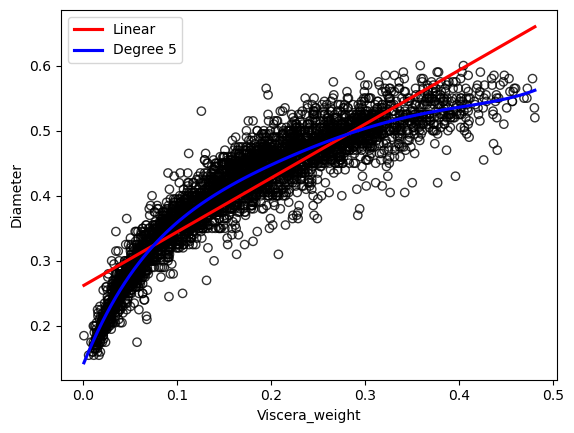

In [59]:
# Viscera Weight

plt.scatter(x=df.Viscera_weight, y=df.Diameter, facecolors='None', edgecolors='k', alpha=.8) 
sns.regplot(x=df.Viscera_weight, y=df.Diameter, ci=None, label='Linear', scatter=False, color='red')
sns.regplot(x=df.Viscera_weight, y=df.Diameter, ci=None, label='Degree 5', order=5, scatter=False, color='blue')
plt.legend()

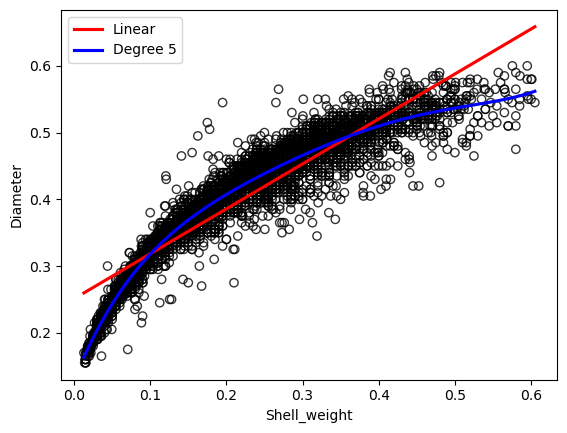

In [58]:
# Shell Weight

plt.scatter(x=df.Shell_weight, y=df.Diameter, facecolors='None', edgecolors='k', alpha=.8) 
sns.regplot(x=df.Shell_weight, y=df.Diameter, ci=None, label='Linear', scatter=False, color='red')
sns.regplot(x=df.Shell_weight, y=df.Diameter, ci=None, label='Degree 5', order=5, scatter=False, color='blue')
plt.legend()

## Height

In [65]:
# Whole Weight

plt.scatter(x=df.Whole_weight, y=df.Height, facecolors='None', edgecolors='k', alpha=.8) 
sns.regplot(x=df.Whole_weight, y=df.Height, ci=None, label='Linear', scatter=False, color='red')
sns.regplot(x=df.Whole_weight, y=df.Height, ci=None, label='Degree 5', order=5, scatter=False, color='blue')
plt.legend()

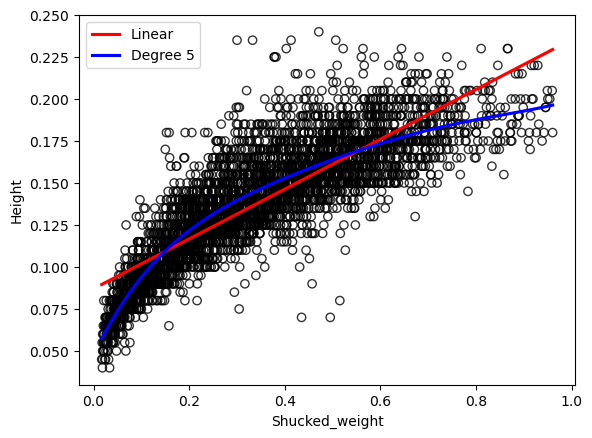

In [66]:
# Shucked Weight

plt.scatter(x=df.Shucked_weight, y=df.Height, facecolors='None', edgecolors='k', alpha=.8) 
sns.regplot(x=df.Shucked_weight, y=df.Height, ci=None, label='Linear', scatter=False, color='red')
sns.regplot(x=df.Shucked_weight, y=df.Height, ci=None, label='Degree 5', order=5, scatter=False, color='blue')
plt.legend()

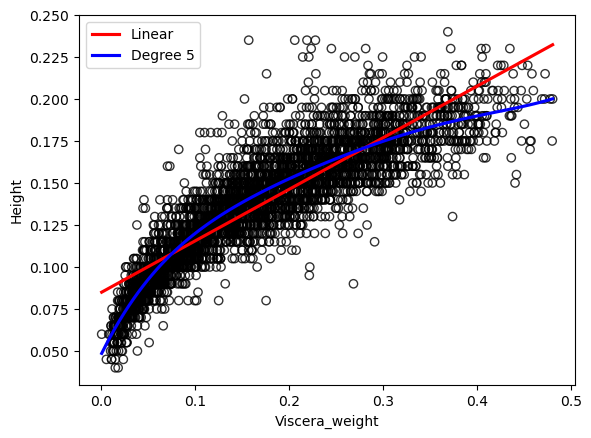

In [67]:
# Viscera Weight

plt.scatter(x=df.Viscera_weight, y=df.Height, facecolors='None', edgecolors='k', alpha=.8) 
sns.regplot(x=df.Viscera_weight, y=df.Height, ci=None, label='Linear', scatter=False, color='red')
sns.regplot(x=df.Viscera_weight, y=df.Height, ci=None, label='Degree 5', order=5, scatter=False, color='blue')
plt.legend()

In [68]:
# Shell Weight

plt.scatter(x=df.Shell_weight, y=df.Height, facecolors='None', edgecolors='k', alpha=.8) 
sns.regplot(x=df.Shell_weight, y=df.Height, ci=None, label='Linear', scatter=False, color='red')
sns.regplot(x=df.Shell_weight, y=df.Height, ci=None, label='Degree 5', order=5, scatter=False, color='blue')
plt.legend()

In [ ]:
# I can compare the height between shell weight and shucked weight

## A Numerical Variable I Would Like To Predict: 

## Prediction

In [72]:
import joblib

In [73]:
# Load the trained model
model = joblib.load('trained_model.pkl')

# Prepare input data (X_test) - assuming X_test is your input data
# You need to prepare X_test in the same format as the data used to train the model

# Make predictions

FileNotFoundError: [Errno 2] No such file or directory: 'trained_model.pkl'

In [ ]:
predictions = model.predict(X_test)
